# Task 2

Perform hyper-parameter tuning on the DecisionTree algorithm in order to predict the target column "packed_cell_volume" for the status of each horse in the dataset. Use 5-fold cross-validation for the hyper-parameter tuning, tune the parameters "criterion", "max_depth", and "min_samples_split". Provide at least 3 values for each parameter.

## Dataset description

### Features

* id - horse identifier
* surgery - was the horse in surgery (0 - no, 1 - yes)
* age - if the horse is young or old (0 - old, 1 - young)
* hospital_number - the identifier of the hospital the horse was treated in
* rectal_temp - the horse's rectal temperature
* pulse - the horse's pulse
* respiratory_rate - the horse's respiratory rate
* temp_of_extremities - the horse's temperature of the extremities (represented as categories ordered by intensity)
* nasogastric_reflux_ph - ph value of the horse's nasogastric reflux
* total_protein - horse's total protein value
* abdomo_protein - horse's abdominal protein value
* surgical_lesion - whether the horse has a surgical lesion or not
* lesion_1 - size of the lesion (0 if the horse doesn't have one)
* cp_data - binary variable

### Target variable
* packed_cell_volume - volume of horse's packed cells

### Download the dataset

In [ ]:
! gdown 1-6y_xGi204yBOq8q_4-i1J-afXxVBHKB

Downloading...
From: https://drive.google.com/uc?id=1-6y_xGi204yBOq8q_4-i1J-afXxVBHKB
To: /content/data_g2.csv
100% 72.4k/72.4k [00:00<00:00, 92.4MB/s]


### Read the dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data = pd.read_csv('/content/data_g2.csv')

In [ ]:
data.head(3)

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,surgical_lesion,lesion_1,cp_data
0,0,1,0,530001,38.1,132.0,24.0,2,6.5,57.0,8.5,3.4,1,2209,0
1,1,1,0,533836,37.5,88.0,12.0,2,2.0,33.0,64.0,2.0,1,2208,0
2,2,1,0,529812,38.3,120.0,28.0,2,3.5,37.0,6.4,3.4,1,5124,0


### Check if dataset is balanced, or if not applicable give your reasons why



<Axes: ylabel='Frequency'>

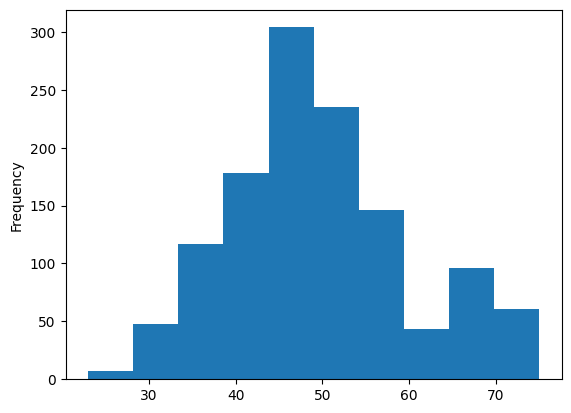

In [ ]:
data['packed_cell_volume'].plot.hist()

### Perform all necessary transformations of the data

In [ ]:
data = data.drop(columns=['id'])

<Axes: >

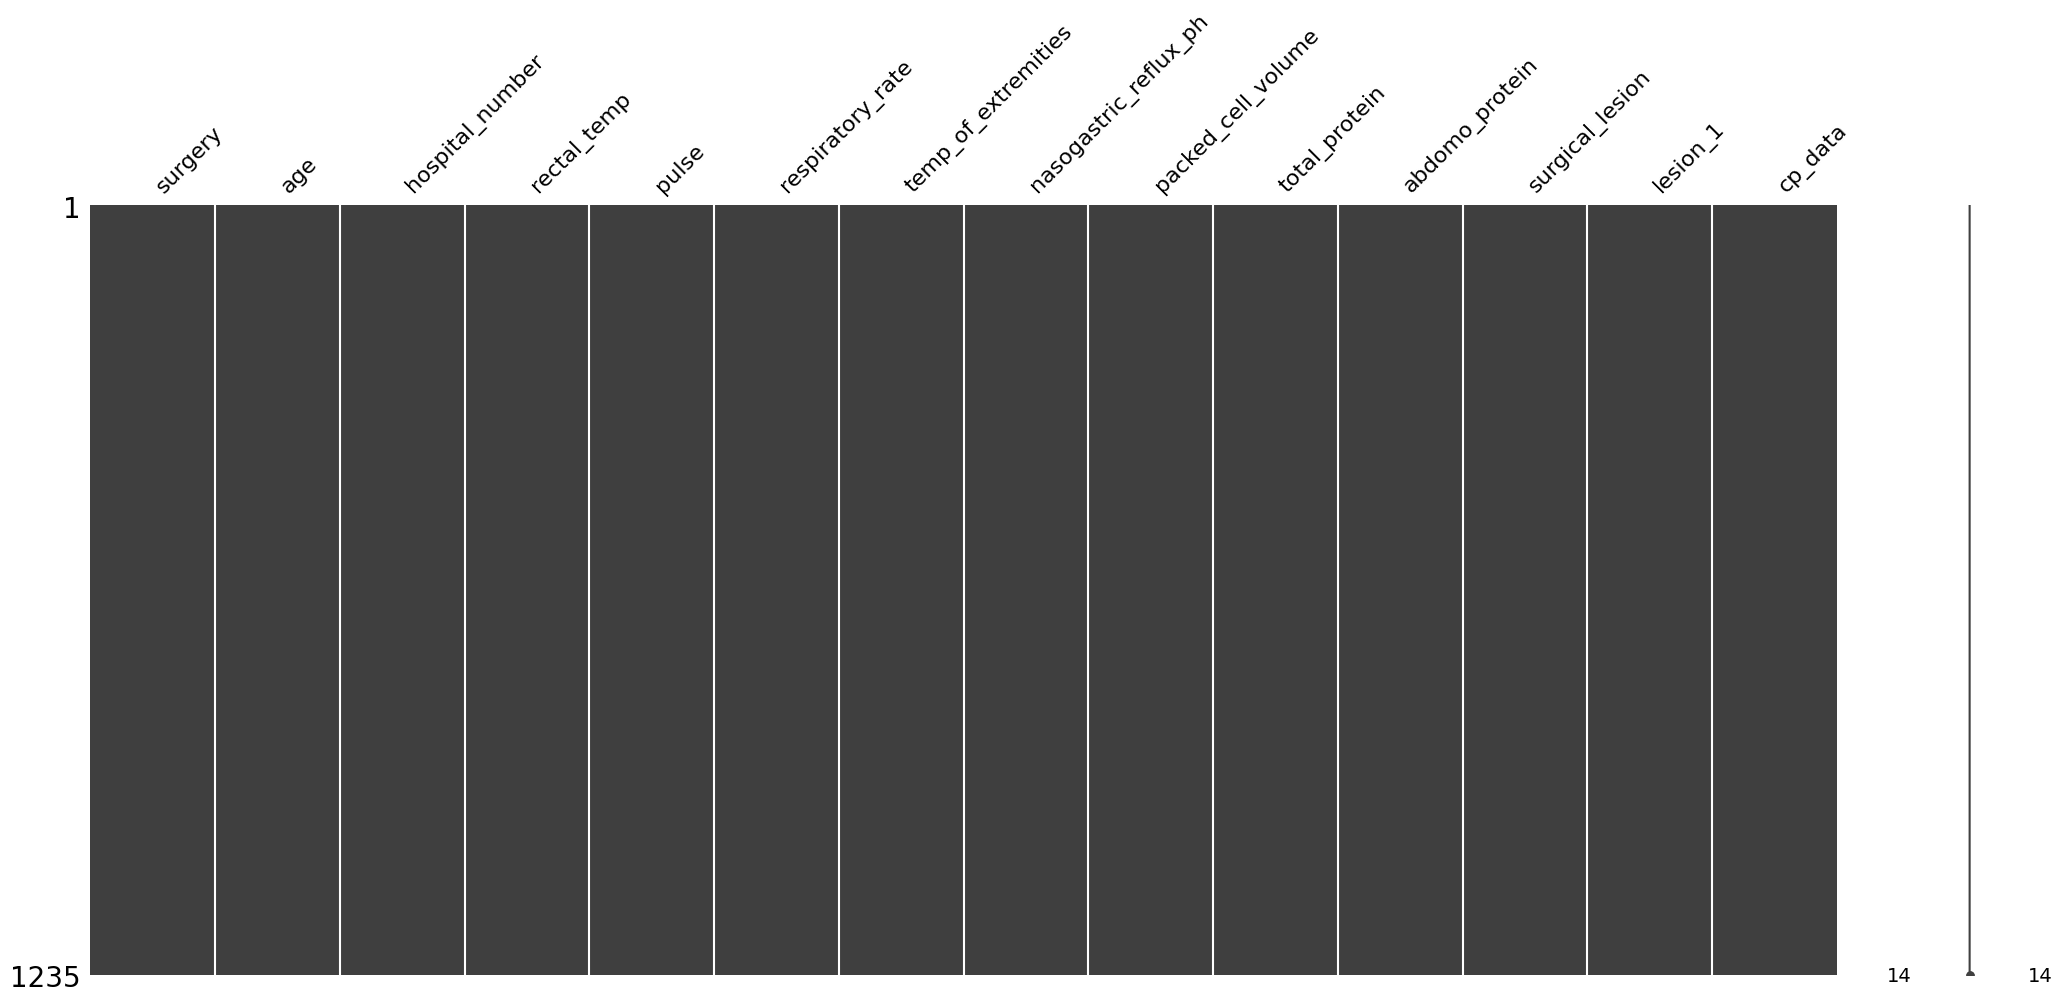

In [ ]:
msno.matrix(data)

### Hyper-parameter tuning and cross-validation

Choose a metric to optimize, choose hyper parameter values to experiment with, perform 5-fold cross-validation.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, f1_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.preprocessing import StandardScaler


In [ ]:
cv = KFold(5)

In [ ]:
params = {
    "criterion": ["squared_error", "friedman_mse", "absolute_error"],
    "max_depth": range(2, 6),
    "min_samples_split": [20, 50, 5],
}

In [ ]:
X, Y = data.drop(columns=['packed_cell_volume']), data['packed_cell_volume']

In [ ]:
results = []
for criterion in params['criterion']:
    for max_depth in params['max_depth']:
        for min_samples in params['min_samples_split']:
            clf = DecisionTreeRegressor(criterion=criterion, max_depth=max_depth, min_samples_split=min_samples)
            predictions = cross_val_predict(clf, X, Y, cv=cv)
            node = {
                "model": clf,
                "score": r2_score(Y, predictions)
            }
            results.append(node)

In [ ]:
results.sort(key=lambda x: x['score'], reverse=True)

In [ ]:
best_model = results[0]['model']

In [ ]:
predictions = cross_val_predict(best_model, X, Y, cv=cv)

### Evaluate the performance of the best model using multiple metrics

In [ ]:
r2_score(Y, predictions)

0.28916240844560537

In [ ]:
mean_squared_error(Y, predictions)

78.84126661394865

In [ ]:
mean_absolute_error(Y, predictions)

6.783850730510135